# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\Administrator\Music


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
#Reading and storing data from CSV files
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

### Data pre-processing

In [10]:
#Preprocessing textual data by removing non-Hebrew characters, stop words, multiple spaces, 
#and fixing suffixes to convert them to their final form.

def datapreprocessing(df: pd.DataFrame):
    df['story'] = df['story'].str.replace(r'[^\u0590-\u05fe\s]+', '', regex=True)
    df['story'] = df['story'].apply(lambda x: re.sub(r'"', '', x))
    df['story'] = df['story'].apply(lambda x: re.sub(r'מ\b', 'ם', x))
    df['story'] = df['story'].apply(lambda x: re.sub(r'נ\b', 'ן', x))
    df['story'] = df['story'].apply(lambda x: re.sub(r'פ\b', 'ף', x))
    df['story'] = df['story'].apply(lambda x: re.sub(r'כ\b', 'ך', x))
    df['story'] = df['story'].apply(lambda x: re.sub(r'צ\b', 'ץ', x))
    df['story'] = df['story'].str.replace(r'\b\w{1,2}\b', '', regex=True)     
    df['story'] = df['story'].apply(lambda x: re.sub(r'\s+', ' ', x))
    
datapreprocessing(df_train)
datapreprocessing(df_test)

In [11]:
#Tokenizing Hebrew text using the Hebrew Tokenizer to extract Hebrew words from the text.

def text_tokenizer(hebrew_text):
    token = ht.tokenize(hebrew_text)
    tokens_list = list(filter(lambda x: (x[0] == 'HEBREW'),token))
    tokens_list = [tuple[1] for tuple in tokens_list]
    return tokens_list

In [13]:
#Assigning binary values to the 'gender' column in the DataFrame df_train,
#where 'm' is replaced with 1 and any other value is replaced with 0

df_train['gender'] = np.where(df_train['gender'] == 'm',1,0)


In [14]:
# split the training data set to feature vectors and target label

X_train = df_train['story']
y_train = df_train['gender']

In [15]:
X_train
y_train

0      כשחבר הזמין אותי לחול באמת חשבתי שזה יקרה פשוט...
1      לפני שהתגייסתי לצבא עשיתי מני מיונים ליחידות מ...
2      מאז שהתחילו הלימודים חלומו סטודנט הפנגויה מחפש...
3      כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...
4      הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...
                             ...                        
748     לפני שנה בדיוק טסתי לאמסטרדם שני חברים טובים ...
749    שבוע שעבר העליתי באופן ספונטני רעיון לנסוע משפ...
750    לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...
751    החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים ה...
752    פעם כשהייתי בחו בקבולומביה כחלק מהטיול שלי לדר...
Name: story, Length: 753, dtype: object

0      1
1      1
2      0
3      1
4      0
      ..
748    1
749    1
750    1
751    0
752    1
Name: gender, Length: 753, dtype: int32

In [16]:
# Cross-Validation

In [17]:
#Performing model evaluation and hyperparameter tuning for different classifiers (SGDClassifier, Naive Bayes, Linear SVC)
#using pipelines and grid search. 


best_model = None
best_f1 = 0


SGDClassifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=text_tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', SGDClassifier(max_iter=800, random_state=42))
])



NB_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=text_tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', MultinomialNB())
])



svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=text_tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('classifier', LinearSVC())
])


SGDClassifier_pgrid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__max_iter': [500, 1000, 1500]
}

NB_pgrid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1]
}

svc_pgrid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [800, 1600, 2400]
}


pipelines = [
    ('SGDClassifier', SGDClassifier_pipeline, SGDClassifier_pgrid),
    ('Naive Bayes', NB_pipeline, NB_pgrid),
    ('Linear SVC', svc_pipeline, svc_pgrid)
]


for name, pipeline, pgrid in pipelines:
    print(f"Evaluating model:{name}...")
    grid_search = GridSearchCV(pipeline, pgrid, cv=10,scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters: {grid_search.best_params_}")
    print("CV score=%0.3f" % grid_search.best_score_)
    if grid_search.best_score_ > best_f1:
        best_f1 = grid_search.best_score_
        best_model = grid_search.best_estimator_

print(f"The best model:  {best_model} with an F1 score of {best_f1}.")



Evaluating model:SGDClassifier...


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(tokenizer=<function text_tokenizer at 0x0000029F0E648EE0>)),
                                       ('normalize', Normalizer()),
                                       ('clf',
                                        SGDClassifier(max_iter=800,
                                                      random_state=42))]),
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__max_iter': [500, 1000, 1500],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'tfidf__max_df': [0.5, 0.75, 1.0]},
             scoring='f1_macro')

Best hyperparameters: {'clf__alpha': 0.0001, 'clf__max_iter': 500, 'clf__penalty': 'l1', 'tfidf__max_df': 0.75}
CV score=0.704
Evaluating model:Naive Bayes...


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(tokenizer=<function text_tokenizer at 0x0000029F0E648EE0>)),
                                       ('normalize', Normalizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'tfidf__max_df': [0.5, 0.75, 1.0]},
             scoring='f1_macro')

Best hyperparameters: {'clf__alpha': 0.01, 'tfidf__max_df': 0.5}
CV score=0.503
Evaluating model:Linear SVC...


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(tokenizer=<function text_tokenizer at 0x0000029F0E648EE0>)),
                                       ('normalize', Normalizer()),
                                       ('classifier', LinearSVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__max_iter': [800, 1600, 2400],
                         'classifier__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.5, 0.75, 1.0]},
             scoring='f1_macro')

Best hyperparameters: {'classifier__C': 10, 'classifier__max_iter': 800, 'classifier__penalty': 'l2', 'tfidf__max_df': 0.75}
CV score=0.624
The best model:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.75,
                                 tokenizer=<function text_tokenizer at 0x0000029F0E648EE0>)),
                ('normalize', Normalizer()),
                ('clf',
                 SGDClassifier(max_iter=500, penalty='l1', random_state=42))]) with an F1 score of 0.7043300763771406.


In [18]:
#Performing hyperparameter tuning for the SGDClassifier using a pipeline and grid search.
#The cell defines an SGDClassifier pipeline with a TfidfVectorizer, normalization, and the SGDClassifier itself. 

SGDClassifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=text_tokenizer,max_df=0.73,ngram_range=(1,1))),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', SGDClassifier(random_state=42))
])

param_grid = {
    'clf__alpha': [0.0001, 0.001],
    'clf__penalty': ['l1', 'l2'],
    'clf__loss': ['hinge', 'log'],
    'clf__max_iter': [10,22,50],
    'clf__learning_rate': ['constant', 'optimal'],
    'clf__eta0': [0.1, 1, 10],
    'clf__validation_fraction': [0.1, 0.2],
    'clf__n_iter_no_change': [3, 6]
}


grid_search = GridSearchCV(SGDClassifier_pipeline,param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation F1 score:", grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.73,
                                                        tokenizer=<function text_tokenizer at 0x0000029F0E648EE0>)),
                                       ('normalize', Normalizer()),
                                       ('clf',
                                        SGDClassifier(random_state=42))]),
             param_grid={'clf__alpha': [0.0001, 0.001],
                         'clf__eta0': [0.1, 1, 10],
                         'clf__learning_rate': ['constant', 'optimal'],
                         'clf__loss': ['hinge', 'log'],
                         'clf__max_iter': [10, 22, 50],
                         'clf__n_iter_no_change': [3, 6],
                         'clf__penalty': ['l1', 'l2'],
                         'clf__validation_fraction': [0.1, 0.2]},
             scoring='f1_macro')

Best hyperparameters: {'clf__alpha': 0.0001, 'clf__eta0': 10, 'clf__learning_rate': 'constant', 'clf__loss': 'hinge', 'clf__max_iter': 22, 'clf__n_iter_no_change': 3, 'clf__penalty': 'l1', 'clf__validation_fraction': 0.1}
Cross-validation F1 score: 0.7071854322243507


In [19]:
#Training and evaluating the best model using TF-IDF vectorization

best_model_tfidf = Pipeline(
    [
        ('tfidf', TfidfVectorizer(tokenizer=text_tokenizer,
                                  max_df=0.73, ngram_range=(1, 1))),
        ('normalize', preprocessing.Normalizer(norm='l2')),
        ('clf', SGDClassifier(max_iter=22, random_state=42, alpha=0.0001, penalty='l1', loss='hinge',
         learning_rate='optimal', eta0=1, validation_fraction=0.1, n_iter_no_change=6,))
    ])

best_model_tfidf.fit(X_train, y_train)
f1_scores = cross_val_score(
    best_model_tfidf, X_train, y_train, cv=10, scoring='f1_macro')
avg_f1_score = np.mean(f1_scores)
print("Average F1 score:", avg_f1_score)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.73,
                                 tokenizer=<function text_tokenizer at 0x0000029F0E648EE0>)),
                ('normalize', Normalizer()),
                ('clf',
                 SGDClassifier(eta0=1, max_iter=22, n_iter_no_change=6,
                               penalty='l1', random_state=42))])

Average F1 score: 0.6758830437729157


In [20]:
# Training and evaluating the best model using CountVectorizer 

best_model_countvectorizer = Pipeline(
    [
        ('tfidf', CountVectorizer(tokenizer=text_tokenizer, max_df=0.73, ngram_range=(1, 1))),
        ('normalize', preprocessing.Normalizer(norm='l2')),
        ('clf', SGDClassifier(max_iter=22, random_state=42, alpha=0.0001, penalty='l1', loss='hinge',
         learning_rate='optimal', eta0=1, validation_fraction=0.1, n_iter_no_change=6,))
    ])

best_model_countvectorizer.fit(X_train, y_train)
f1_scores = cross_val_score(
    best_model_countvectorizer, X_train, y_train, cv=10, scoring='f1_macro')
avg_f1_score = np.mean(f1_scores)
print("Average F1 score:", avg_f1_score)

Pipeline(steps=[('tfidf',
                 CountVectorizer(max_df=0.73,
                                 tokenizer=<function text_tokenizer at 0x0000029F0E648EE0>)),
                ('normalize', Normalizer()),
                ('clf',
                 SGDClassifier(eta0=1, max_iter=22, n_iter_no_change=6,
                               penalty='l1', random_state=42))])

Average F1 score: 0.680111678118699


Total Male is: 268
Total female is: 55


([<matplotlib.patches.Wedge at 0x29f17a81e50>,
 [Text(-0.5607740676431349, -0.9463257605386071, 'Males'),
  Text(0.6117534316818768, 1.03235543240952, 'Females')],
 [Text(-0.30587676416898263, -0.5161776875665128, '82.97%'),
  Text(0.3568561684810948, 0.6022073355722201, '17.03%')])

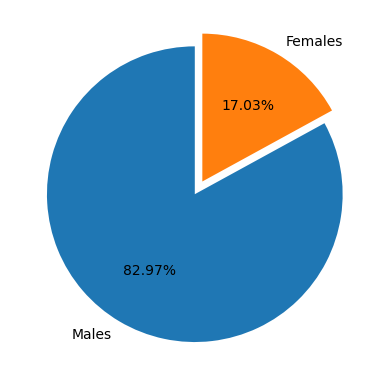

In [42]:
#Predicting the gender labels for the test data using the best model trained with
#TF-IDF vectorization, calculating the total number of males and females, and visualizing the distribution with a pie chart.

y_pred = best_model_tfidf.predict(df_test["story"])


def sumMale(ypred):
    total = 0
    for num in ypred:
        if num == 1:
            total += 1
    return total

totalMale= sumMale(y_pred)
print("Total Male is:" , totalMale)
totalFemale= len(y_pred)-totalMale
print("Total female is:", totalFemale)

counts = [totalMale, totalFemale]
labels = ['Males', 'Females']
plt.pie(counts, labels=labels, 
          autopct="%0.2f%%", 
          explode=[0, 0.1], 
          startangle=90)


In [40]:
#Creating two DataFrames, one displaying the first five rows and the other displaying the last five rows of 
#the test example IDs along with their corresponding predicted gender labels.

y_pred = np.where(y_pred == 1, 'm', 'f')
pd.DataFrame({'id_test': df_test["test_example_id"], 'y_pred': y_pred}).head(5)
pd.DataFrame({'id_test': df_test["test_example_id"], 'y_pred': y_pred}).tail(5)

,id_test,y_pred
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f


,id_test,y_pred
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


In [41]:
# create dataframe with the test results

df_predicted = pd.DataFrame(
    {'test_example_id': df_test['test_example_id'], 'predicted_category': y_pred})
df_predicted

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f
...,...,...
318,318,m
319,319,m
320,320,m
321,321,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)